In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve
import seaborn as sns
from keras.models import Model
import cv2
from tensorflow.keras import backend as K


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Grading_dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Grading_dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'C:/Users/kamya/OneDrive/Desktop/Mango_Classification/Grading_dataset',
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [50]:
import matplotlib.pyplot as plt

def show_image_samples(generator):
    # Get the class indices from the generator
    class_indices = generator.class_indices
    
    # Get the class names from the class indices
    class_names = list(class_indices.keys())
    
    # Get a sample batch from the generator
    images, labels = next(generator)
    
    # Plot the images and their labels
    plt.figure(figsize=(10, 10))
    for i in range(min(images.shape[0], 25)):
        plt.subplot(5, 5, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

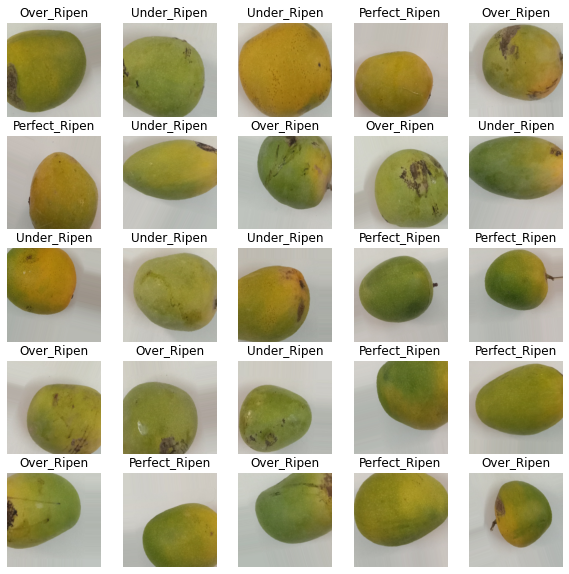

In [51]:
show_image_samples(train_generator)

In [4]:
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential()
for layer in vgg_model.layers:
    model.add(layer)

for layer in model.layers:
    layer.trainable = False

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
        train_generator,
        epochs=50,
        validation_data=validation_generator,
        verbose=1)

Epoch 1/50
15/15 [==============================] - 91s 6s/step - loss: 1.4761 - accuracy: 0.4875 - val_loss: 2.8602 - val_accuracy: 0.4583
Epoch 2/50
15/15 [==============================] - 89s 6s/step - loss: 1.2597 - accuracy: 0.5500 - val_loss: 5.4689 - val_accuracy: 0.3583
Epoch 3/50
15/15 [==============================] - 89s 6s/step - loss: 1.0519 - accuracy: 0.6104 - val_loss: 3.8765 - val_accuracy: 0.3917
Epoch 4/50
15/15 [==============================] - 90s 6s/step - loss: 0.9576 - accuracy: 0.6438 - val_loss: 3.5112 - val_accuracy: 0.3833
Epoch 5/50
15/15 [==============================] - 94s 6s/step - loss: 0.9102 - accuracy: 0.6562 - val_loss: 2.1380 - val_accuracy: 0.3917
Epoch 6/50
15/15 [==============================] - 89s 6s/step - loss: 0.9089 - accuracy: 0.6750 - val_loss: 0.9873 - val_accuracy: 0.5833
Epoch 7/50
15/15 [==============================] - 89s 6s/step - loss: 0.8415 - accuracy: 0.7042 - val_loss: 0.9163 - val_accuracy: 0.6417
Epoch 8/50
15/15 [==

In [12]:
# Testing Accuracy on Valisation Dataset
loss, accuracy = model.evaluate(validation_generator)
print('Validation Accuracy: {:.2f}%'.format(accuracy*100))


4/4 [==============================] - 13s 3s/step - loss: 0.5306 - accuracy: 0.8083
Validation Accuracy: 80.83%


In [13]:
# Testing Accuracy on Training Dataset
loss, accuracy = model.evaluate(test_generator)
print('Test Accuracy: {:.2f}%'.format(accuracy*100))

19/19 [==============================] - 83s 4s/step - loss: 0.2123 - accuracy: 0.9267
Test Accuracy: 92.67%


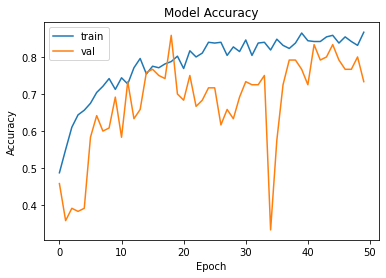

In [14]:
import matplotlib.pyplot as plt

# plot accuracy for both Validation and Training Datasets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

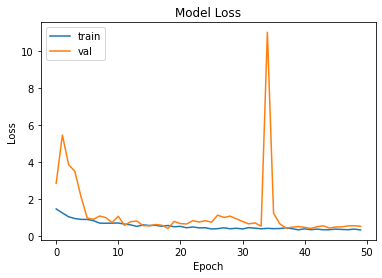

In [15]:
# plot loss for both Validation and Training Datasets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 314ms/step
Predicted class: Perfect_Ripen


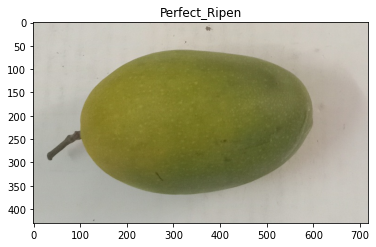

In [16]:
# Predicting the Class of Test Image

from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing import image

# Load the test image
test_image = load_img('C:/Users/kamya/OneDrive/Desktop/Mango_Classification/test/IMG_20210703_142244.jpg', target_size=(224, 224))

# Convert the image to a numpy array
test_image_array = img_to_array(test_image)

# Preprocess the image (same as training data preprocessing)
test_image_array = test_image_array / 255.0

# Reshape the array to match the input shape of the model
test_image_array = test_image_array.reshape((1, 224, 224, 3))

# Make a prediction using the model
prediction = model.predict(test_image_array)

# Print the predicted class
predicted_class_index = np.argmax(prediction)
class_names = ['Over_Ripen', 'Perfect_Ripen','Under_RIpen']
predicted_class_name = class_names[predicted_class_index]
print('Predicted class:', predicted_class_name)

# Display the test image
plt.imshow(image.load_img('C:/Users/kamya/OneDrive/Desktop/Mango_Classification/test/IMG_20210703_142244.jpg'))
plt.title(predicted_class_name)
plt.show()


In [20]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')



4/4 [==============================] - 13s 3s/step


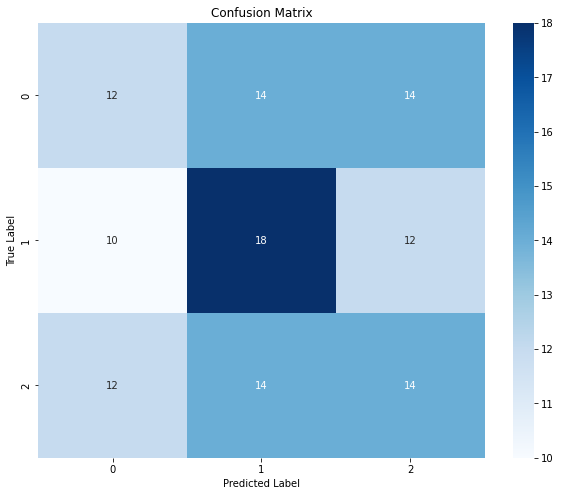

In [23]:
# Plotting Confusion Matrix
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
plot_confusion_matrix(validation_generator.classes, y_pred_classes)



In [52]:
model.save('model.h5')


In [54]:
from keras.models import load_model

loaded_model = load_model('model.h5')
